# **Project Name**    - Amazon Prime Movies and TV Shows Clustering
##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Member Name -** Eileen Ip
# **Project Summary -**  

Amazon Prime is another one of the most popular media and video streaming platforms. As of mid-2021, Amazon Prime have close to 10000 movies or tv shows available on their platform and have over 200M Subscribers globally. It will be interesting to explore what all other insights can be obtained from the same dataset.

* Understanding the dataset
* Clean the data to make analysis ready
* Explore the data and understand its behaviour 
* Prepare the dataset for creating clusters by various parameters wherein I remove stop words, white spaces numbers etc. So that I can get the important words and based on that I can form clusters.
* Used the silhouette method and k-means elbow method to find optimal number of clusters 
* Built recommender system by cosine similarity  
* Recommended top ten movies

# **GitHub Link -**


# **Problem Statement -**
This dataset consists of tv shows and movies available on Amazon Prime as of 2021. The dataset is collected from Kaggle.

In 2021, they released an interesting report which shows that the number of TV shows on Amazon Prime has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

**In this project, required to do:**

*   Exploratory Data Analysis.
*   Understanding what type content is available in different countries.
*   Is Amazon Prime has increasingly focusing on TV rather than movies in recent years.
*   Clustering similar content by matching text-based features.

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
import scipy.stats as stats

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

# Library used for textual data preprocessing
import string
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt_tab')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from statsmodels.stats.proportion import proportions_ztest

# Library used for Clusters implementation
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

# Library used for building recommendation system
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import *

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\eilee\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


### Dataset Loading

In [ ]:
# Load Dataset from github repository
df = pd.read_csv("amazon_prime_titles.csv")

### Dataset First View

In [580]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,30-Mar-21,2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,30-Mar-21,2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,30-Mar-21,2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,30-Mar-21,1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


### Dataset Rows & Columns count

In [581]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  9668
Number of columns are:  12


### Dataset Information

In [582]:
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7585 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


#### Check for Duplicate Values

In [583]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


#### Check for Missing Values/Null Values

In [584]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2083
cast            1233
country         8996
date_added      9513
release_year       0
rating           337
duration           0
listed_in          0
description        0
dtype: int64

<Axes: >

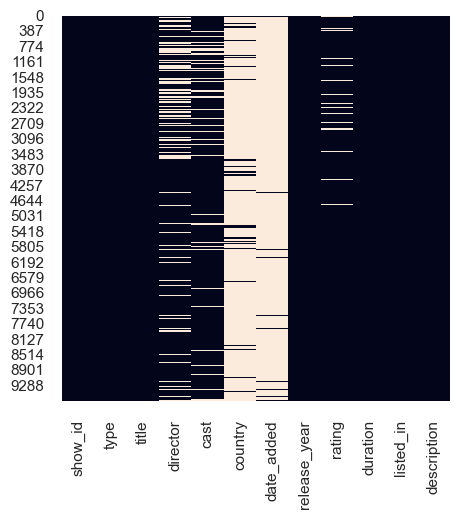

In [542]:
# Visualizing the missing values
# Checking Null Value by Plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

### Notes:
* The Amazon Prime dataset consists of tv shows and movies available on Amazon Prime as of 2021.
* There are 9969 rows and 12 columns provided in the data.
* Null values are present in director, cast, country, date_added, and rating; Since there are only few null values present in rating we will remove them from the data.
* No duplicate values exist.

## ***2. Understanding Your Variables***

In [543]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [544]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,9668,9668,9668,7585,8435,672,155,9668.00,9331,9668,9668,9668
unique,9668,2,9668,5773,7927,86,84,NaN,24,219,518,9414
top,s1,Movie,The Grand Seduction,Mark Knight,Maggie Binkley,United States,30-Mar-21,NaN,13+,1 Season,Drama,"Arpo was designed as a commando robot, built a..."
freq,1,7814,1,113,56,253,14,NaN,2117,1342,986,15
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.34,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1920.00,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2007.00,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.00,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.00,NaN,NaN,NaN,NaN


### Variables Description
### <b> The dataset contains movies and tv shows information (show id, type, title, director, release year, rating, duration etc.).</b>


<b>Attribute Information : </b>

- **show_id**: Unique Id number for all the listed rows

- **type**: denotes type of show namely TV Show or Movie

- **title**: title of the movie

- **director**: Name of director/directors

- **cast**: lists the cast of the movie

- **country**: country of the production house

- **date_added**: the date the show was added

- **release_year**: year of the release of the show

- **rating**: show ratings

- **duration**: duration of the show

- **listed_in**: the genre of the show

- **description**: summary/ description of the movie


### Check Unique Values for each variable.

In [545]:
# Check Unique Values for each variable using a for loop.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in show_id is 9668
No. of unique values in type is 2
No. of unique values in title is 9668
No. of unique values in director is 5773
No. of unique values in cast is 7927
No. of unique values in country is 86
No. of unique values in date_added is 84
No. of unique values in release_year is 100
No. of unique values in rating is 24
No. of unique values in duration is 219
No. of unique values in listed_in is 518
No. of unique values in description is 9414


## ***3. Data Wrangling***

### Data Wrangling Code

In [546]:
# Before doing any data wrangling lets create copy of the dataset
data = df.copy()

In [547]:
# Filling cast null values as not available
data['cast'] = data['cast'].fillna(value='Not available')

In [548]:
# Filling country null values as not known, the same can be replaced by mode of the country using the below commented code
# Note: only one line should be selected to run this
data['country'] = data['country'].fillna(value='Not Known')
# data['country'] = data['country'].fillna(value=data['country'].mode())

In [549]:
# Since director and date_added have many null values if we drop them, we loss a lot data so, I replace them with unknown.
data['director'] = data['director'].fillna(value='Unknown')
data['date_added'] = data['date_added'].fillna(value='Unknown')

In [550]:
# Since rating have low number of missing values,Ii have dropping the same
data = data.dropna()

In [551]:
# Checking missing values again for confirmation
data.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

### Data Manipulation Summary

To make the data analysis ready i have done the following:
1. Filled missing values of cast with Not available.
2. Filled missing values of country with Not Known.
3. Dropped rows of date_added missing values.
4. Dropped rows of ratings missing values.
5. Dropped the entire column of director as it had much number of missing values.


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 : Movies vs TV Shows Share

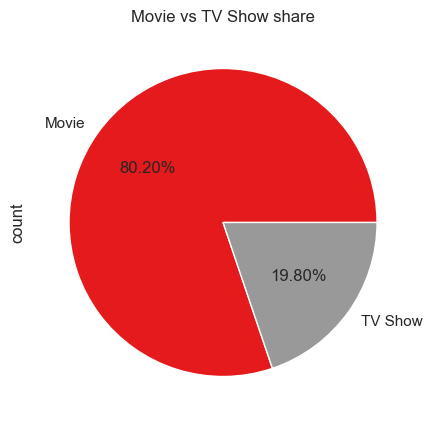

In [552]:
# Chart - 1 Pie Chart Visualization Code For Movie vs TV Show Share
spread = data['type'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Movie vs TV Show share')
plt.show()

##### 1. Why did you pick the specific chart?
A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Wherever different percentage comparison comes into action, pie chart is used frequently. So, I have used Pie Chart and which helped us to get the percentage comparison more clearly and precisely.

##### 2. What is/are the insight(s) found from the chart?
From the above chart, we got to know that the types of shows available in Amazon prime is not even with high count for TV shows. 80.82% of the data belongs to movies and 19.18% of the data for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the types of shows most watched by the audience.

#### Chart - 2 : Distribution of Various Ratings

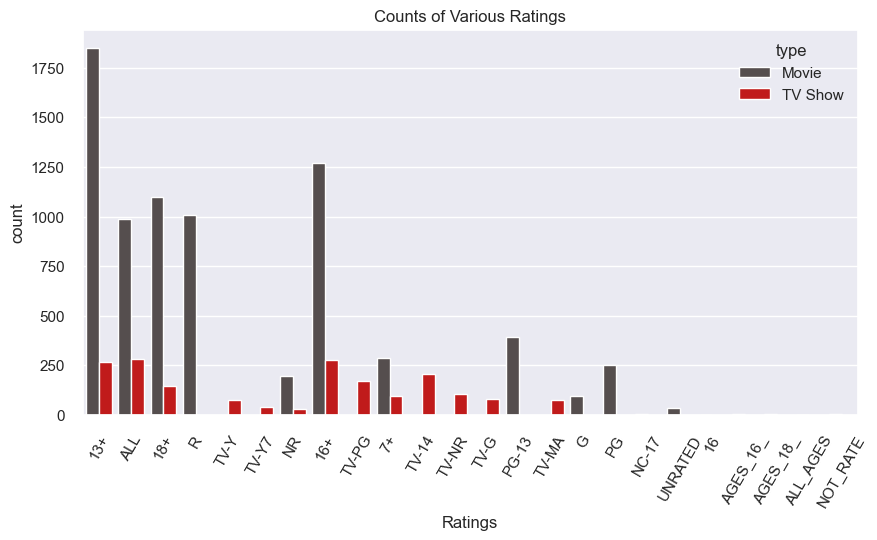

Each Rating Counts for Different Types of Shows:
rating    type   
13+       Movie      1849
          TV Show     268
16        Movie         1
16+       Movie      1272
          TV Show     275
18+       Movie      1097
          TV Show     146
7+        Movie       288
          TV Show      97
AGES_16_  Movie         2
AGES_18_  Movie         3
ALL       Movie       988
          TV Show     280
ALL_AGES  Movie         1
G         Movie        93
NC-17     Movie         3
NOT_RATE  Movie         3
NR        Movie       194
          TV Show      29
PG        Movie       253
PG-13     Movie       393
R         Movie      1010
TV-14     TV Show     208
TV-G      TV Show      81
TV-MA     TV Show      77
TV-NR     TV Show     105
TV-PG     TV Show     169
TV-Y      TV Show      74
TV-Y7     TV Show      39
UNRATED   Movie        33
dtype: int64


In [553]:
# Chart - 2 Count Plot Visualization Code for Various Ratings of Shows
plt.figure(figsize=(10, 5))
sns.countplot(x='rating', hue='type', data=data, palette=['#564d4d', '#db0000'])

# Set Labels
plt.title('Counts of Various Ratings')
plt.xlabel('Ratings')
plt.xticks(rotation = 60)

# Display Chart
plt.show()

# Printing The Counts of Each Rating for Different Type Shows
print('Each Rating Counts for Different Types of Shows:')
print(data.groupby(['rating', 'type']).size())

##### 1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?
From above count plot we can clearly see that the most of the ratings are given by ALL followed by 13+ and the least ratings are given by 16 and All Ages.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

***Each TV show and movie on Amazon Prime is assigned a maturity rating to help members make informed choices for themselves and their children. Amazon Prime determines maturity ratings by the frequency and impact of mature content in a TV show or movie. TV show ratings reflect the overall maturity level of the whole series.***

* Young Children:G, TV-Y, TV-G
* Older Children: PG, TV-Y7, TV-Y7-FV, TV-PG
* Teens: PG-13, TV-14
* Mature: R, NC-17, TV-MA

Yes, from above insight we got to know:

* ALL tops the charts, indicating that mature content is more popular on Amazon Prime.
* This popularity is followed by 13+ and 16+, which are Shows focused on Teens and Older kids.
* Very few titles with a rating All ages and 16 exist. It can be understood since this type of content is purely for the audience of any ages which is not popular.

#### Chart - 3 : Top 10 Countries with Most Content

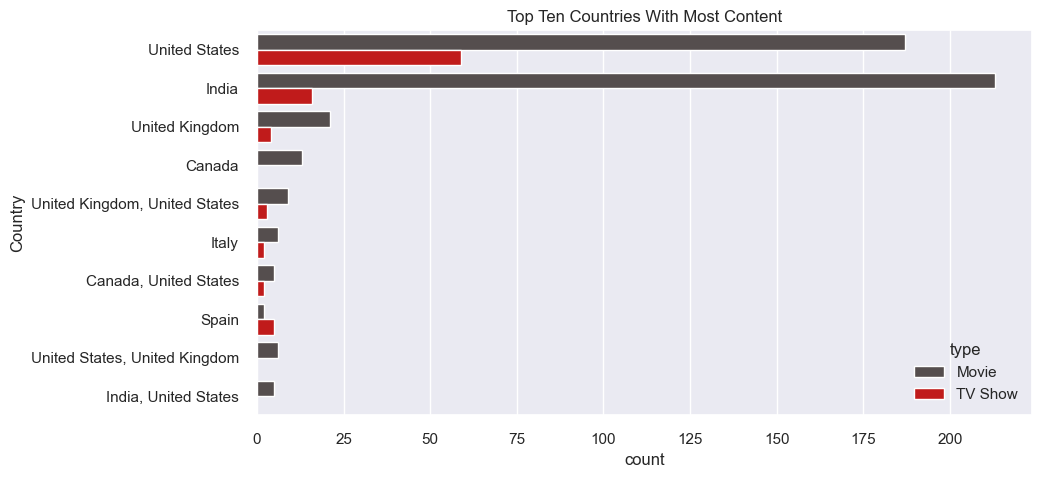

Number of Shows Produced by Top 10 Countries:
type     country                      
Movie    India                            213
         United States                    187
         United Kingdom                    21
         Canada                            13
         United Kingdom, United States      9
         United States, United Kingdom      6
         Italy                              6
         Canada, United States              5
         India, United States               5
         Australia                          4
TV Show  United States                     59
         India                             16
         Spain                              5
         United Kingdom                     4
         United Kingdom, United States      3
         Germany                            2
         Italy                              2
         Japan                              2
         Mexico                             2
         Canada, United States           

In [554]:
# Chart - 3 Count Plot Visualization Code for Content Produced by Different Countries
# Not Taking Unknown Countries
country_df = data[data['country'] != 'Not Known']

# Set Labels
plt.figure(figsize=(10, 5))
sns.countplot(y='country', hue='type', data=country_df, palette=['#564d4d', '#db0000'], order=country_df.country.value_counts().iloc[:10].index)
plt.title('Top Ten Countries With Most Content')
plt.ylabel('Country')

# Display Chart
plt.show()

# Printing The Counts of Different Shows for Top 10 Countries
print('Number of Shows Produced by Top 10 Countries:')
print(country_df.groupby(['type']).country.value_counts().groupby(level=0, group_keys=False).head(10))

##### 1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
##### 2. What is/are the insight(s) found from the chart?
From above count plot we found that the content belongs to United States alone is 253 (Movie: 194, TV Show: 59) and followed by India is 229 (Movie: 213, TV Show: 16).
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
Yes, from above insight we got to know:
* The United States is a leading producer of both types of shows (Movies and TV Shows), this makes sense since Amazon Prime is a US company.

* The influence of Bollywood in India explains the type of content available, and perhaps the main focus of this industry is Movies and not TV Shows.

* On the other hand, TV Shows are more frequent in South Korea, which explains the KDrama culture nowadays.

#### Chart - 4 : Content Released Over The Years

In [555]:
# Create New DataFrames for Movie and TV Show Release
release_year_df = data[['type','release_year']]
movie_year = release_year_df[release_year_df['type']=='Movie'].release_year.value_counts().to_frame().reset_index()

show_year = release_year_df[release_year_df['type']=='TV Show'].release_year.value_counts().to_frame().reset_index()

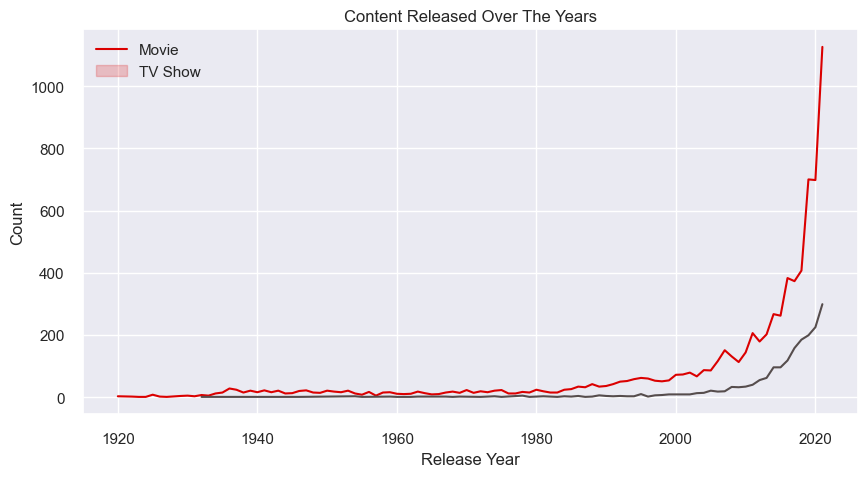

In [556]:
# Chart - 4 Line Plot Visualization Code for Content Released Over The Years
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=movie_year, x='release_year', y='count', color = '#db0000')
sns.lineplot(data=show_year, x='release_year', y='count', color = '#564d4d')

# Set Labels
plt.title('Content Released Over The Years')
plt.legend(['Movie','TV Show'])
plt.xlabel('Release Year')
plt.ylabel('Count')

# Display Chart
plt.show()

In [557]:
# Printing The Counts of Different Shows Released for Top 10 Years
print('Number of Shows Released in Each Year:')
print(data.groupby(['type']).release_year.value_counts().groupby(level=0, group_keys=False).head(10))

Number of Shows Released in Each Year:
type     release_year
Movie    2021            1126
         2019             700
         2020             698
         2018             407
         2016             383
         2017             373
         2014             267
         2015             262
         2011             206
         2013             202
TV Show  2021             299
         2020             225
         2019             199
         2018             185
         2017             158
         2016             118
         2015              96
         2014              96
         2013              62
         2012              55
Name: count, dtype: int64


##### 1. Why did you pick the specific chart?
A line plot, also known as a line chart or line graph, is a way to visualize the trend of a single variable over time. It uses a series of data points connected by a line to show how the value of the variable changes over time.

Line plots are useful because they can quickly and easily show trends and patterns in the data. They are particularly useful for showing how a variable changes over a period of time. They are also useful for comparing the trends of multiple variables.

To see how the different contents are released over the years i have used line plot here.
##### 2. What is/are the insight(s) found from the chart?
From above graph, it is observed that most of the content on amazon prime are of the release date from 2010 to 2020.
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
From the above insight we got to know:
* Growth in the number of movies on Amazon Prime is much higher than tv shows.
* Most of the content available was released between 2010 and 2020.
* The highest number of movies got released in 2017 and 2018 and tv shows got released in 2019 and 2020.
* The line plot shows very few movies, and tv shows got released before the year 2010 and in 2021. It is due to very little data collected from the year 2021.

#### Chart - 5 : Duration Distribution for Amazon Prime Movies

In [558]:
# Splitting Movie and Separating Values
df_movies = data[data['type']=='Movie'].copy()
df_movies.duration = df_movies.duration.str.replace(' min','').astype(int)

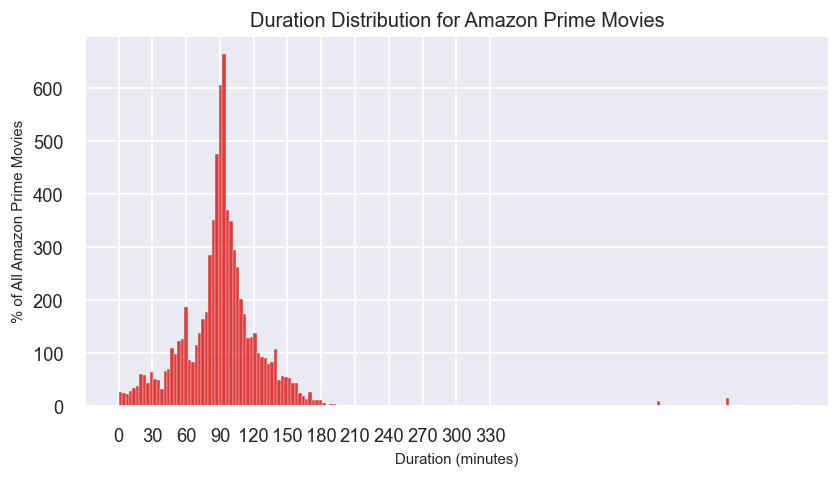

In [ ]:
# Chart - 6 Histogram Visualization Code for Duration Distribution of Amazon Prime Movies
plt.figure(figsize=(8,4), dpi=120)
sns.set(style="darkgrid")
sns.histplot(df_movies.duration, color='#db0000')
plt.xticks(np.arange(0,360,30))

# Set Labels
plt.title("Duration Distribution for Amazon Prime Movies")
plt.ylabel("% of All Amazon Prime Movies", fontsize=9)
plt.xlabel("Duration (minutes)", fontsize=9)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?
A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the duration distributions for the amazon prime movies.
##### 2. What is/are the insight(s) found from the chart?
From the above chart we come to know that most of the movies last for 90 to 120 minutes.
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
From the above insight we got to know:

*  On Amazon Prime most of the movies last for 90 to 120 minutes.
*  So for target audience, movies duration will be greater than minimum 90 minutes.

#### Chart - 6 : Most Used Words in Shows Title

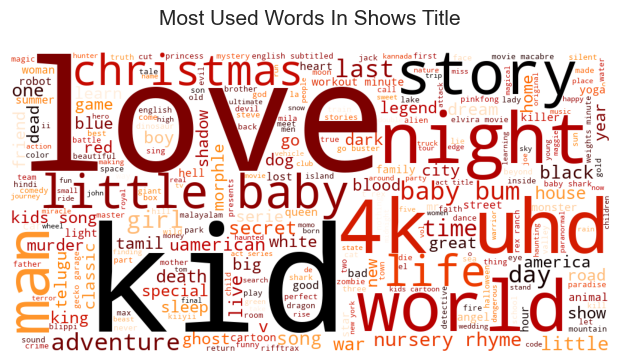

In [560]:
# Chart - 6 WordCloud Plot Visualization Code for Most Used Words in Amazon Prime Shows Title
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in data.title:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Shows Title', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?
The word cloud graphic is a visual representation that supplements a section of text to help readers better understand an idea or approach a subject from a different angle. A word cloud shows off trends.
##### 2. What is/are the insight(s) found from the chart?
From above word cloud plot, it is observed that most repeated words in title include Kid, Love, World, Man, and Story.
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
From the above insight we got to know:
* Most repeated words in title include Kid, Love, World, Man, and Story.
* We saw that most of the movies and tv shows got added during the winters, which tells why love appeared many times in the titles.

#### Chart - 7 : Top 10 Genres on Amazon Prime

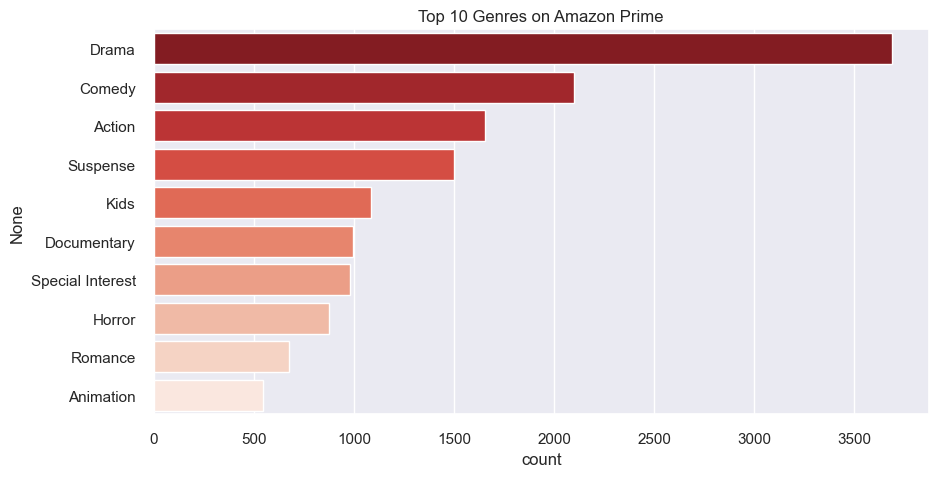

In [561]:
# Chart - 7 Count Plot Visualization Code for Top 10 Genres on Amazon Prime
# Separating Genres
genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack()

# Set Labels and Ploting Graph for Top 10 Genres
plt.figure(figsize=(10,5))
g = sns.countplot(y = genres, order=genres.value_counts().index[:10], palette = "Reds_r")
plt.title('Top 10 Genres on Amazon Prime')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
##### 2. What is/are the insight(s) found from the chart?
From above graph, it is observed that international movies is in top in terms of genre and followed by dramas and comedies.
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
From the above insight we got to know:
* In terms of genres, international movies takes the cake surprisingly followed by dramas and comedies.
* Even though the United States has the most content available, it looks like Amazon Prime has decided to release a ton of international movies.

#### Chart - 8 : Top 10 Directors on Amazon Prime

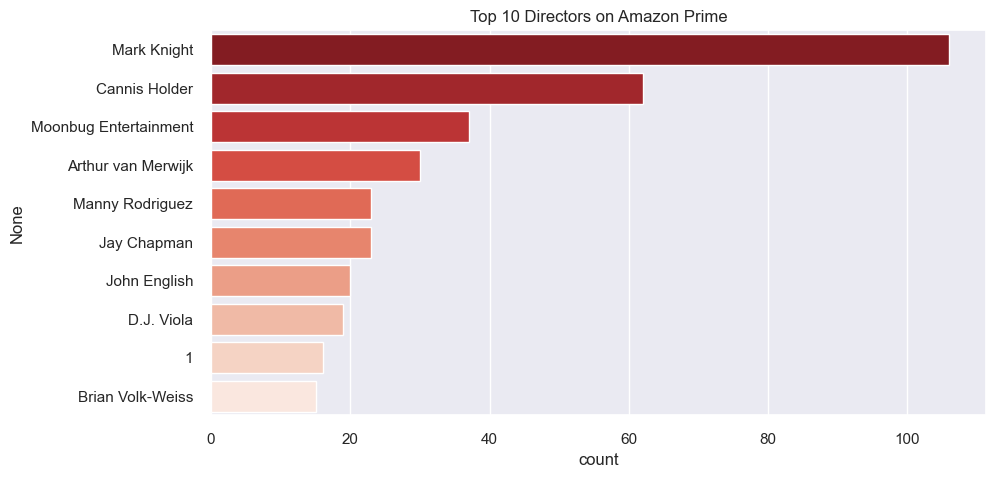

In [562]:
# Chart - 9 Count Plot Visualization Code for Top 10 Directors on Amazon Prime
directors = data[data.director != 'Unknown'].set_index('title').director.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

# Set Labels and Ploting Graph for Top 10 Directors
plt.figure(figsize=(10,5))
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='Reds_r')
plt.title('Top 10 Directors on Amazon Prime')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
##### 2. What is/are the insight(s) found from the chart?
From the above chart we come to know that the most popular director in Amazon Prime is Mark Knight and followed by Cannis Holder and Moonbug Entertainment.
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
From the above insight we got to know:
* Mark Knight, Cannis Holder,  Moonbug Entertainment, Jay Capman and Arthur van Merwijk are the top 5 directors which highest number of movies and tv shows are available in Amazon Prime.
* As we stated previously regarding the top genres, it's no surprise that the most popular directors on Amazon Prime with the most titles are mainly international as well.

#### Chart - 9 : Top 10 Actors on Amazon Prime

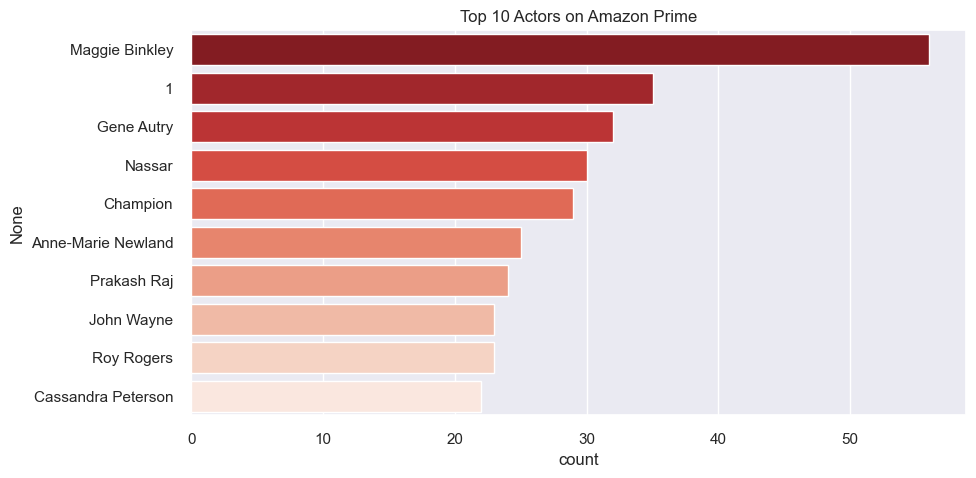

In [563]:
# Chart - 10 Count Plot Visualisation Code for Top 10 Actors on Amazon Prime
actor = data[data.cast != 'Not available'].set_index('title').cast.str.split(', ', expand=True).stack()

# Set Labels and Ploting Graph for Top 10 Actors
plt.figure(figsize=(10,5))
sns.countplot(y = actor, order=actor.value_counts().index[:10], palette='Reds_r')
plt.title('Top 10 Actors on Amazon Prime')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?
Bar charts are used to compare the size or frequency of different categories or groups of data. Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.
##### 2. What is/are the insight(s) found from the chart?
From above graph, it is observed that most popular actors with most content in Amazon Prime are Maggie Binkley, 1, Gene Atry and followed by Nassar and Champion.
##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.
From the above insight we got to know:
*  That the actors in the top ten list of most numbers tv shows and movies are from India.
*  Maggie Binkley, 1 and Gene Autry have 30 above content alone in Amazon Prime.

#### Chart - 10 : Pair Plot

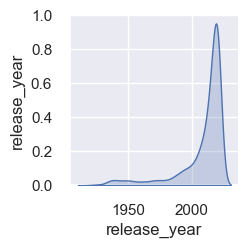

In [564]:
# Pair Plot Visualization Code
sns.pairplot(data, diag_kind="kde", kind = 'reg')

# Display Chart
plt.show()

##### 1. Why did you pick the specific chart?
A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.
##### 2. What is/are the insight(s) found from the chart?
Since there is only one value in dataframe of integer type, we are unable to visualize the pair plot.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments I have noticed that some variable of our Amazon Prime dataset does not seems to normally distributed so I have made hypothetical assumption that our data is normally distributed and for that I have decided to do statistical analysis.

1.   Average number of movies on Amazon Prime in **United States** is greater than the average number of movies on Amazon Prime in **India**.
2.   The number of **movies** available on Amazon Prime is greater than the number of **TV shows** available on Amazon Prime.

### Hypothetical Statement - 1

Average number of movies on Amazon Prime in **United States** is greater than the average number of movies on Amazon Prime in **India**.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
Null hypothesis: $H_o : μ_{united states} = μ_{india}$

Alternate hypothesis: $H_1 : μ_{united states} \neq μ_{india}$

Test Type: Two-sample t-test

#### 2. Perform an appropriate statistical test.

In [565]:
# Perform Statistical Test to obtain P-Value
# Split the data into the 'united states' and 'india's' movie produced groups
us_movie_df = df_movies[df_movies.country == 'United States']
india_movie_df = df_movies[df_movies.country == 'India']

In [566]:
# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie_df['release_year'], india_movie_df['release_year'], equal_var=False)

# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")

Since p-value (1.2365456054761003e-07) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


##### Which statistical test have you done to obtain P-Value?
To compare the number of movies available on Amazon Prime in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?
I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movies data from Amazon Prime for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2
The number of **movies** available on Amazon Prime is greater than the number of **TV shows** available on Amazon Prime.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.
Null hypothesis: $H_o : μ_{movie} = μ_{tv show}$

Alternate hypothesis: $H_1 : μ_{movie} \neq μ_{tv show}$

Test Type: Two sample z-test

#### 2. Perform an appropriate statistical test.

In [567]:
# Perform Statistical Test to obtain P-Value
# Count the number of movies and TV shows in the DataFrame
n_movies = data[data['type'] == 'Movie'].count()['type']
n_tv_shows = data[data['type'] == 'TV Show'].count()['type']

In [ ]:
# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(data), len(data)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)
print()

if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Amazon Prime.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Amazon Prime.")

Z-statistic: 82.49826659389728
P-value: 0.0

Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Amazon Prime, I conducted a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Amazon Prime because the data consists of two categorical variables.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [569]:
# Handling Missing Values & Missing Value Imputation
data.isna().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?
Its already handled in data wrangling, so now there are no missing values to handle in the given dataset.

### 2. Handling Outliers
(Most of the columns are categorical, so no outliers observed)

### 3. Categorical Encoding
(No need as the data is categorical)

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [570]:
# Expand Contraction
# Create a new column called 'tags' in the DataFrame 'data'
# The purpose of this column is to store text data that will be used for model building
# The text data consists of the 'description', 'rating', 'country', 'listed_in' and 'cast' columns
data['tags'] = data['description'] + ' ' + data['rating'] + ' ' + data['country'] + ' ' + data['listed_in'] + ' ' + data['cast']

In [571]:
# Cross checking our result for the function created
print(data['tags'])

1       A Metro Family decides to fight a Cyber Crimin...
16      When a strange virus quickly spreads through a...
17      A heart warming and inspiring series that welc...
18      Zoë Coombs Marr has been on hiatus. Sort of. F...
19      ZOE tells a tale of forbidden love between an ...
                              ...                        
9663    New York City street principles get an East Si...
9664    This is Earth, 2100AD - and these are the adve...
9665    In war-torn Eastern Europe, a world-weary grou...
9666    The series tells the story of Diego Maradona, ...
9667    Harry Brown, starring two-time Academy Award w...
Name: tags, Length: 9331, dtype: object


#### 2. Lower Casing

In [572]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(to_lower)

# Cross checking our result for the function created
print(data['tags'])

1       a metro family decides to fight a cyber crimin...
16      when a strange virus quickly spreads through a...
17      a heart warming and inspiring series that welc...
18      zoë coombs marr has been on hiatus. sort of. f...
19      zoe tells a tale of forbidden love between an ...
                              ...                        
9663    new york city street principles get an east si...
9664    this is earth, 2100ad - and these are the adve...
9665    in war-torn eastern europe, a world-weary grou...
9666    the series tells the story of diego maradona, ...
9667    harry brown, starring two-time academy award w...
Name: tags, Length: 9331, dtype: object


#### 3. Removing Punctuations

In [573]:
# Remove Punctuations
# Define a function to remove punctuations from text
def remove_punctuation(text):
    '''a function for removing punctuation'''
    # Replace each punctuation mark with no space, effectively deleting it from the text
    translator = str.maketrans('', '', string.punctuation)
    text_without_punct = text.translate(translator)
    return text_without_punct

# Apply the remove_punctuation function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_punctuation)

# Cross-check our result that the function worked as expected
print(data['tags'])

1       a metro family decides to fight a cyber crimin...
16      when a strange virus quickly spreads through a...
17      a heart warming and inspiring series that welc...
18      zoë coombs marr has been on hiatus sort of for...
19      zoe tells a tale of forbidden love between an ...
                              ...                        
9663    new york city street principles get an east si...
9664    this is earth 2100ad  and these are the advent...
9665    in wartorn eastern europe a worldweary group o...
9666    the series tells the story of diego maradona a...
9667    harry brown starring twotime academy award win...
Name: tags, Length: 9331, dtype: object


#### 4. Removing URLs & Removing words and digits contain digits.

In [574]:
# Remove URLs & Remove words and digits contain digits
# 'tags' column does not have any URLs so remove words and digits containing digits
data['tags'] = data['tags'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
print(data['tags'])

1       a metro family decides to fight a cyber crimin...
16      when a strange virus quickly spreads through a...
17      a heart warming and inspiring series that welc...
18      zoë coombs marr has been on hiatus sort of for...
19      zoe tells a tale of forbidden love between an ...
                              ...                        
9663    new york city street principles get an east si...
9664    this is earth   and these are the adventures o...
9665    in wartorn eastern europe a worldweary group o...
9666    the series tells the story of diego maradona a...
9667    harry brown starring twotime academy award win...
Name: tags, Length: 9331, dtype: object


#### 5. Removing Stopwords & Removing White spaces

In [575]:
# Remove Stopwords
# Since the language is english, we need to import english stop words
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(x):
  ''' function to remove stop words'''
  x = x.split()
  res = ''
  for word in x:
    if word not in stop_words:
      res = res + ' ' + word
  return res

# Apply the remove_stop_words function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(remove_stop_words)

# Cross-check our result for the function created
print(data['tags'])

1        metro family decides fight cyber criminal thr...
16       strange virus quickly spreads safari park tur...
17       heart warming inspiring series welcomes arriv...
18       zoë coombs marr hiatus sort six years stacks ...
19       zoe tells tale forbidden love engineer robot ...
                              ...                        
9663     new york city street principles get east side...
9664     earth adventures cult hit space patrol join g...
9665     wartorn eastern europe worldweary group merce...
9666     series tells story diego maradona boy argenti...
9667     harry brown starring twotime academy award wi...
Name: tags, Length: 9331, dtype: object


In [576]:
# Remove White spaces in 'tags' column
data['tags'] = data['tags'].str.strip()

# Cross-check our result for the function created
print(data['tags'])

1       metro family decides fight cyber criminal thre...
16      strange virus quickly spreads safari park turn...
17      heart warming inspiring series welcomes arriva...
18      zoë coombs marr hiatus sort six years stacks a...
19      zoe tells tale forbidden love engineer robot z...
                              ...                        
9663    new york city street principles get east side ...
9664    earth adventures cult hit space patrol join ga...
9665    wartorn eastern europe worldweary group mercen...
9666    series tells story diego maradona boy argentin...
9667    harry brown starring twotime academy award win...
Name: tags, Length: 9331, dtype: object


#### 6. Rephrase Text
(Not required)

In [588]:
# Rephrase Text
# Rephrasing can be achived by the following code
# def rephrase_tags(x):
#      return x.replace('interesting', 'fascinating')
# data['tags'] = data['tags'].apply(rephrase_tags)
# print(data['tags'])

#### 7. Tokenization

In [585]:
# Tokenization

# Apply the tokenization to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(data['tags'])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = data['tags']

1       [metro, family, decides, fight, cyber, crimina...
16      [strange, virus, quickly, spreads, safari, par...
17      [heart, warming, inspiring, series, welcomes, ...
18      [zoë, coombs, marr, hiatus, sort, six, years, ...
19      [zoe, tells, tale, forbidden, love, engineer, ...
                              ...                        
9663    [new, york, city, street, principles, get, eas...
9664    [earth, adventures, cult, hit, space, patrol, ...
9665    [wartorn, eastern, europe, worldweary, group, ...
9666    [series, tells, story, diego, maradona, boy, a...
9667    [harry, brown, starring, twotime, academy, awa...
Name: tags, Length: 9331, dtype: object


#### 8. Text Normalization

In [586]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
data['tags'] = data['tags'].apply(stemming)

# Cross-check our result for the function created
print(data['tags'][1])

metro famili decid fight cyber crimin threaten stabil pride india drama intern mahesh manjrekar abhay mahajan sachin khedekar


##### Which text normalization technique have you used and why?
Here i use Stemming.

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas". Stemming is important in natural language understanding (NLU) and natural language processing (NLP). Stemming is important in natural language processing(NLP). Nil means the suffix is replaced with nothing and is just removed. There may be cases where these rules vary depending on the words. As in the case of the suffix 'ed' if the words are 'cared' and 'bumped' they will be stemmed as 'care' and 'bump'.

SnowballStemmer:

Snowball is a small string processing language for creating stemming algorithms for use in Information Retrieval, plus a collection of stemming algorithms implemented using it. It was originally designed and built by Martin Porter. SnowballStemmer() is a module in NLTK that implements the Snowball stemming technique.

#### 9. Part of speech tagging

In [ ]:
# POS Tagging

# Apply the pos tagging to the 'tags' column of the DataFrame
data['tags'] = temp_tags.apply(nltk.pos_tag)

# Cross-check our result for the function created
print(data['tags'])

1       [(metro, NNS), (family, NN), (decides, VBZ), (...
16      [(strange, JJ), (virus, NN), (quickly, RB), (s...
17      [(heart, NN), (warming, VBG), (inspiring, VBG)...
18      [(zoë, NN), (coombs, NNS), (marr, VBP), (hiatu...
19      [(zoe, NN), (tells, NNS), (tale, JJ), (forbidd...
                              ...                        
9663    [(new, JJ), (york, NN), (city, NN), (street, N...
9664    [(earth, NN), (adventures, NNS), (cult, VBP), ...
9665    [(wartorn, JJ), (eastern, JJ), (europe, NN), (...
9666    [(series, NN), (tells, VBZ), (story, NN), (die...
9667    [(harry, NN), (brown, RP), (starring, VBG), (t...
Name: tags, Length: 9331, dtype: object


In [689]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
data['tags']=data['tags'].apply(sentence)

# Cross-check our result for the function created
print(data['tags'])

1       m e t r o   f a m i l y   d e c i d e s   f i ...
16      s t r a n g e   v i r u s   q u i c k l y   s ...
17      h e a r t   w a r m i n g   i n s p i r i n g ...
18      z o ë   c o o m b s   m a r r   h i a t u s   ...
19      z o e   t e l l s   t a l e   f o r b i d d e ...
                              ...                        
9663    n e w   y o r k   c i t y   s t r e e t   p r ...
9664    e a r t h   a d v e n t u r e s   c u l t   h ...
9665    w a r t o r n   e a s t e r n   e u r o p e   ...
9666    s e r i e s   t e l l s   s t o r y   d i e g ...
9667    h a r r y   b r o w n   s t a r r i n g   t w ...
Name: tags, Length: 9331, dtype: object


#### 10. Text Vectorization

In [592]:
# Vectorizing Text
# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(stop_words='english', lowercase=False, max_features = 9000)
# setting max features = 9000 to prevent system from crashing

# Fit the vectorizer using the text data
tfidf.fit(data['tags'])

# Collect the vocabulary items used in the vectorizer
dictionary = tfidf.vocabulary_.items()

In [593]:
# Convert vector into array form for clustering
vector = tfidf.transform(data['tags']).toarray()

# Summarize encoded vector
print(vector)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [594]:
print(tfidf.get_feature_names_out())

['aadar' 'aadukalam' 'aamir' ... 'zsa' 'zucker' 'zuniga']


In [595]:
vec_data=pd.DataFrame(vector)
vec_data

,0,1,2,3,4,5,6,7,8,9,...,8990,8991,8992,8993,8994,8995,8996,8997,8998,8999
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.256356,0.0,0.0,0.00000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.398691,0.0,0.0,0.00000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.59393,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9326,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
9327,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
9328,0.0,0.0,0.0,0.0,0.0,0.236298,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0
9329,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?
I have use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

I have use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. I can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### 5. Feature Manipulation & Selection
(Not required)

### 6. Data Transformation
(No need to transform this data because this data is in form of Text Vectorization)

### 7. Data Scaling
(Here the units of whole data are same so no need to do scaling)

### 8. Dimensionality Reduction
##### Do you think that dimensionality reduction is needed? Explain Why?
Yes its needed, because dimensionality reduction removes the least important variables from the model. That will reduce the model's complexity and also remove some noise in the data. Its also helps to mitigate overfitting.

In [596]:
# Dimensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this might take a while..
pca = PCA(random_state=32)
pca.fit(vector)

PCA(random_state=32)

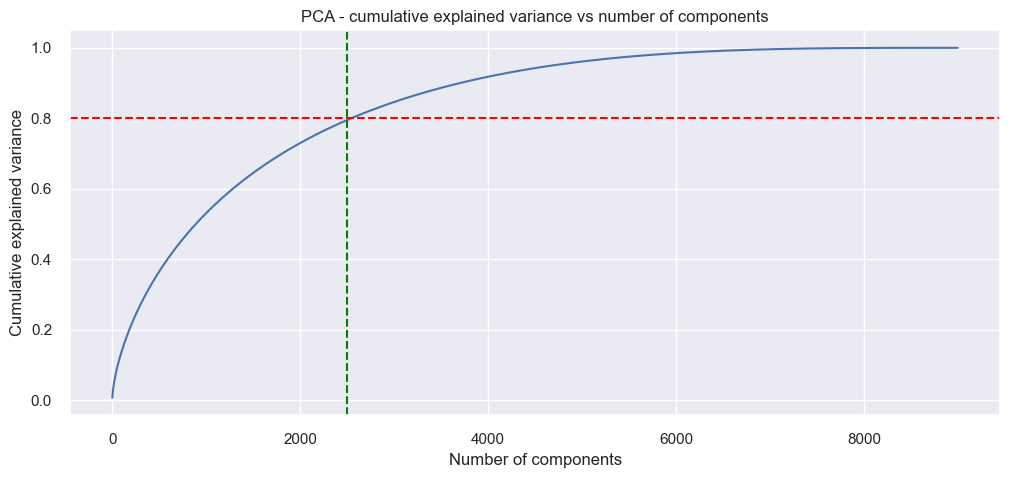

In [597]:
# Plot a Graph for PCA
plt.figure(figsize=(12, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# Set labels
plt.title('PCA - cumulative explained variance vs number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 2500, color='green', linestyle='--')

# Display chart
plt.show()

In [598]:
# Reducing the dimensions to 2500 using pca
pca = PCA(n_components=2500, random_state=32)
pca.fit(vector)

PCA(n_components=2500, random_state=32)

In [599]:
# Transformed features
X = pca.transform(vector)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)
We can use PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

### 9. Data Splitting
(Not required)

### 10. Handling Imbalanced Dataset
(Not required)

## ***7. ML Model Implementation***

### ML Model - 1 : K-Means Clustering (For Metric Distortion)

KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=11), k=(3, 12),
                 locate_elbow=False, timings=False)

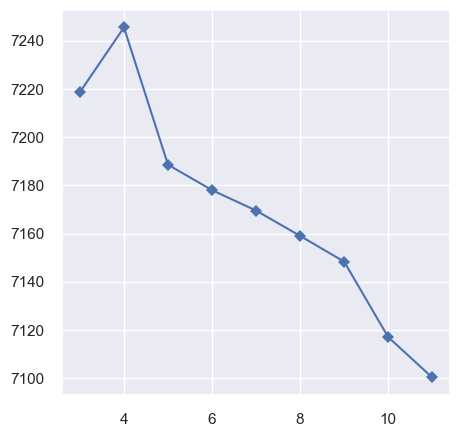

In [600]:
# ML Model - 1 Implementation
# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(3,12), metric='distortion', timings=False, locate_elbow=False)

# Fit the data to the visualizer
visualizer.fit(X)

From this plot, we can say that the best k value is 5. Because, after this point the distortion/inertia is start decreasing in a linear fashion.

In [610]:
# Instantiate the K-Means clustering model where number of clusters is 5
kmean=KMeans(n_clusters=5)

# Fit the data to the KMean cluster
kmean.fit(X)

# Predict on the model
y_kmean=kmean.predict(X)

Labelling the dataset as per the cluster.

In [611]:
# Adding a new column 'K_mean_cluster' in the dataset
data["K_mean_cluster"]=y_kmean
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags,K_mean_cluster
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,metro famili decid fight cyber crimin threaten...,1
16,s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",Not Known,Unknown,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...,strang virus quick spread safari park turn zoo...,0
17,s18,TV Show,Zoo Babies,Unknown,Narrator - Gillian Barlett,Not Known,Unknown,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...,heart warm inspir seri welcom arriv new member...,2
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,Unknown,Zoë Coombs Marr,Not Known,Unknown,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,zoë coomb marr hiatus sort six year stack awar...,4
19,s20,Movie,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",Not Known,Unknown,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...,zoe tell tale forbidden love engin robot zoe l...,0


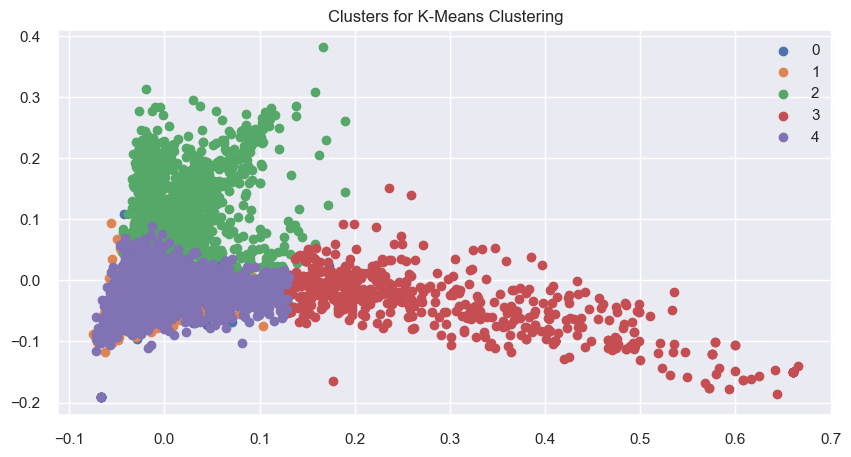

In [612]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_kmean == i , 0] ,X[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [613]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the result of our algorithm. We can see that cluster wise data distribution in this chart

Here I used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.


K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data. The algorithm looks a little bit like…

(1) Initialize K random centroids.

   You could pick K random data points and make those your starting points.

   Otherwise, you pick K random values for each variable.

(2) For every data point, look at which centroid is nearest to it.

   Using some sort of measurement like Euclidean or Cosine distance.

(3) Assign the data point to the nearest centroid.

(4) For every centroid, move the centroid to the average of the points assigned to that centroid.

(5) Repeat the last three steps until the centroid assignment no longer changes.

  The algorithm is said to have “converged” once there are no more changes.



These centroids act as the average representation of the points that are assigned to it. This gives you a story almost right away. You can compare the centroid values and tell if one cluster favors a group of variables or if the clusters have logical groupings of key variables.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules

##### Which hyperparameter optimization technique have you used and why?
Here I have use Elbow Method for optimal number of k.

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square).   i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2 : Hierarchical Clustering (Agglomerative Clustering)

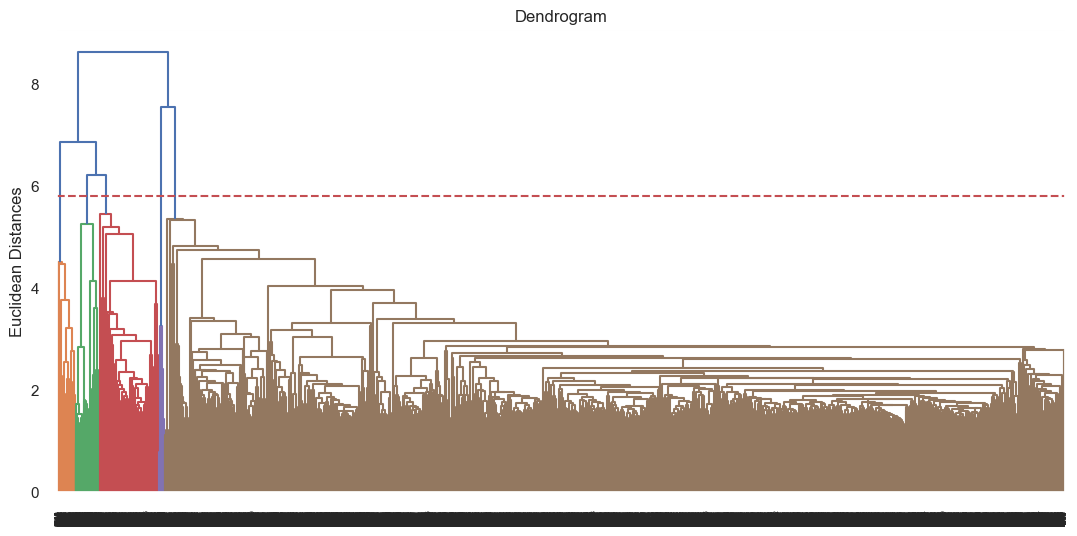

In [614]:
# ML Model - 2 Implementation
# Using the dendrogram to find the optimal number of clusters

# Instantiate the dendogram
plt.figure(figsize=(13,6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))

# Set labels
plt.title('Dendrogram')
plt.ylabel('Euclidean Distances')
plt.axhline(y=5.8, color='r', linestyle='--')

# Display Chart
plt.show()

From this graph we can say that optimal number of clusters is 5.

In [619]:
# Instantiate the Agglomerative clustering model where number of clusters is 6
aggh = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Fit the data to the Agglomerative cluster
aggh.fit(X)

# Predict on the model
y_hc=aggh.fit_predict(X)

In [620]:
# Adding a new column 'Agg_cluster' in the dataset
data["Agg_cluster"]=y_hc
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,tags,K_mean_cluster,Agg_cluster
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,30-Mar-21,2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...,metro famili decid fight cyber crimin threaten...,1,1
16,s17,Movie,Zoombies,Glenn Miller,"Marcus Anderson, Kaiwi Lyman, Andrew Asper",Not Known,Unknown,2016,13+,87 min,"Horror, Science Fiction",When a strange virus quickly spreads through a...,strang virus quick spread safari park turn zoo...,0,1
17,s18,TV Show,Zoo Babies,Unknown,Narrator - Gillian Barlett,Not Known,Unknown,2008,ALL,1 Season,"Kids, Special Interest",A heart warming and inspiring series that welc...,heart warm inspir seri welcom arriv new member...,2,1
18,s19,TV Show,Zoë Coombs Marr: Bossy Bottom,Unknown,Zoë Coombs Marr,Not Known,Unknown,2020,18+,1 Season,"Comedy, Talk Show and Variety",Zoë Coombs Marr has been on hiatus. Sort of. F...,zoë coomb marr hiatus sort six year stack awar...,4,1
19,s20,Movie,Zoe,Drake Doremus,"Ewan McGregor, Léa Seydoux, Theo James, Mirand...",Not Known,Unknown,2018,R,104 min,Science Fiction,ZOE tells a tale of forbidden love between an ...,zoe tell tale forbidden love engin robot zoe l...,0,1


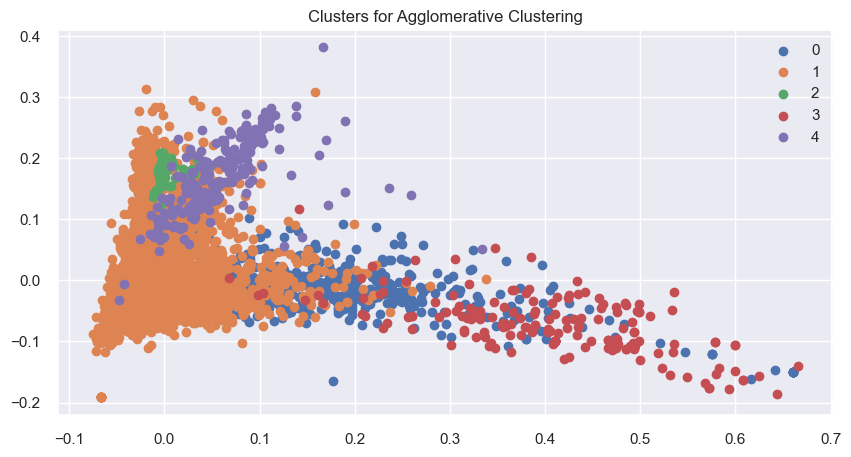

In [621]:
# Getting unique labels
u_labels = np.unique(y_hc)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(X[y_hc == i , 0] ,X[y_hc == i , 1] , label = i)
plt.title('Clusters for Agglomerative Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the performance of our algorithm. Here we can see the different clusters

Here i used Agglomerative Clustering.

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

Agglomerative Hierarchical Clustering (AHC) is an iterative classification method whose principle is simple.

(1) The process starts by calculating the dissimilarity between the N objects.

(2) Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.

(3) Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

This process continues until all the objects have been clustered.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Here for optimal number of clusters i have use Dendrogram. We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?
I have use Dendrogram for optimal number of clusters.

A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities. Each branch is called a clade. There is no limit to the number of leaves in a clade.

A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes. To avoid crossing lines, the diagram is graphically arranged so that members of each pair of classes to be merged are neighbors in the diagram. The Dendrogram tool uses a hierarchical clustering algorithm.

A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure.\

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Here we get optimal number of cluster is 6.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.
Here we cannot directly predict the number of cluster . After plotting dendrogram chart we can get optimal number of clusters and we can implement it directly in the data.

### ML Model - 3 : Silhouette Score for Clustering

In [622]:
# ML Model - 3 Implementation
# Finding optimal number of clusters using the Silhouette Score
for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(X)
  preds = km.predict(X)
  centers = km.cluster_centers_
  score = silhouette_score(X, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

For n_clusters = 2, silhouette score is 0.0233
For n_clusters = 3, silhouette score is 0.0271
For n_clusters = 4, silhouette score is 0.0057
For n_clusters = 5, silhouette score is 0.0066
For n_clusters = 6, silhouette score is 0.0065
For n_clusters = 7, silhouette score is 0.0076
For n_clusters = 8, silhouette score is 0.0080
For n_clusters = 9, silhouette score is 0.0078
For n_clusters = 10, silhouette score is 0.0064
For n_clusters = 11, silhouette score is 0.0074
For n_clusters = 12, silhouette score is 0.0077
For n_clusters = 13, silhouette score is 0.0088
For n_clusters = 14, silhouette score is 0.0096


From this chart we can say that optimal number of cluster is 5. Because the silhouette score is highest for the cluster 5.

For n_clusters = 2, silhouette score is 0.023330440365939984


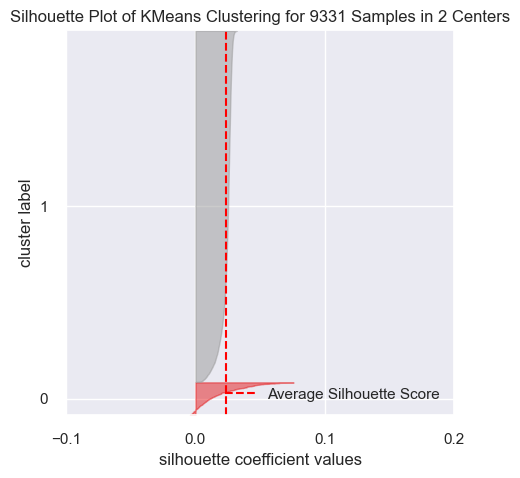

For n_clusters = 3, silhouette score is 0.027094983541176138


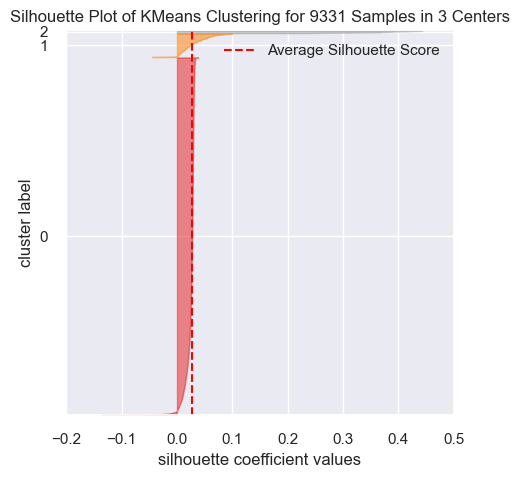

For n_clusters = 4, silhouette score is 0.005739448511695677


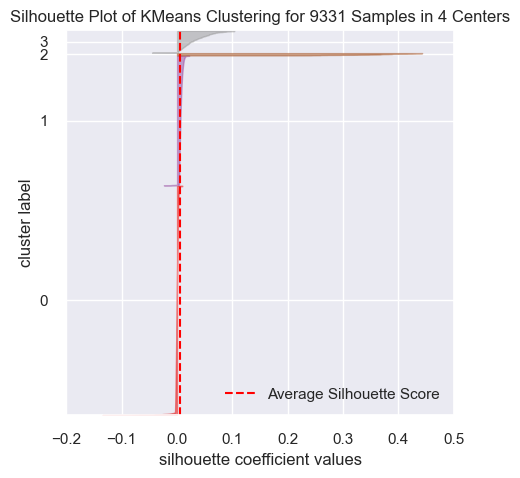

For n_clusters = 5, silhouette score is 0.006620820600094073


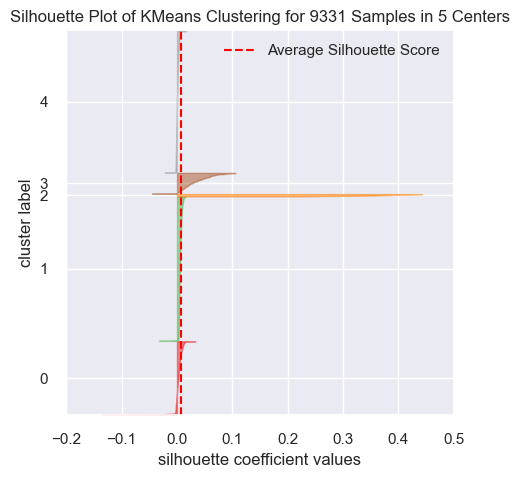

For n_clusters = 6, silhouette score is 0.006502064069536016


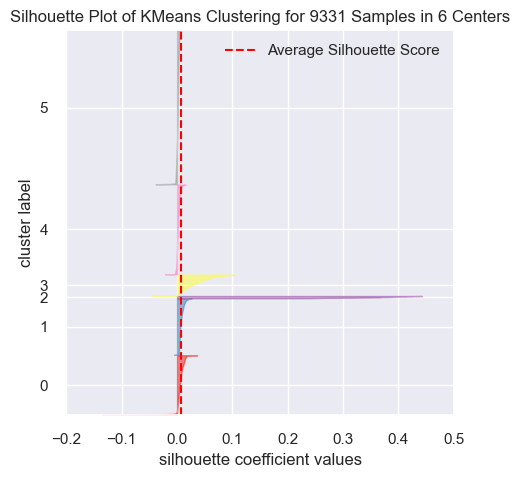

For n_clusters = 7, silhouette score is 0.007599726225193642


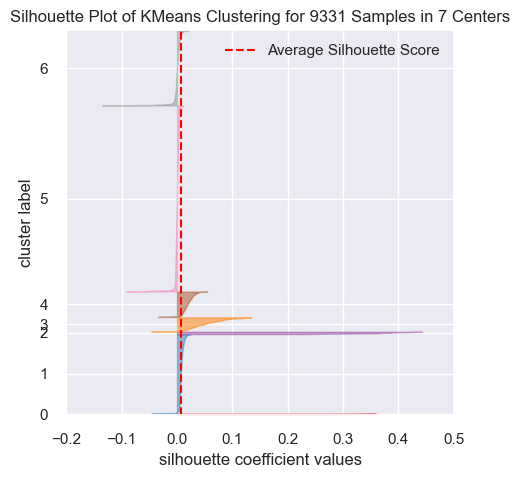

For n_clusters = 8, silhouette score is 0.007955946509106419


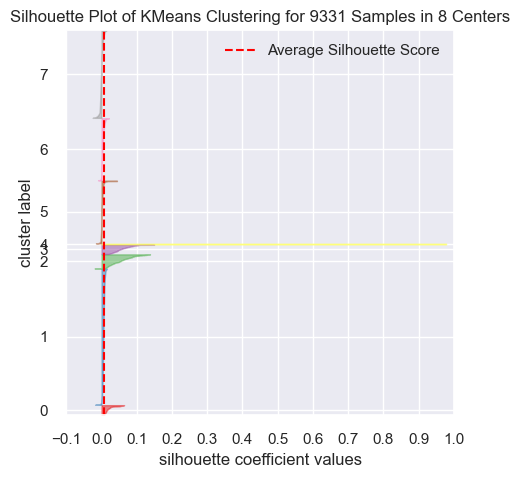

For n_clusters = 9, silhouette score is 0.0077755972954893044


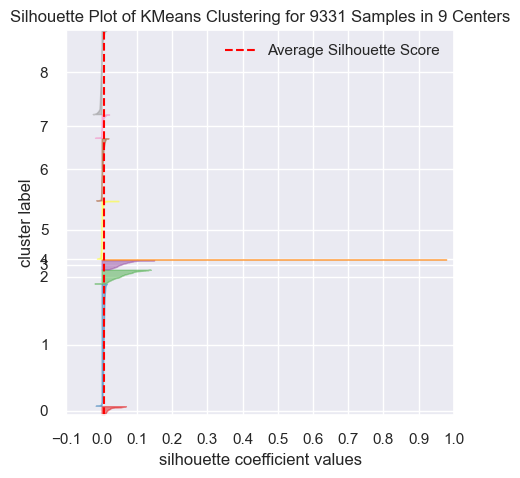

For n_clusters = 10, silhouette score is 0.006420983766842271


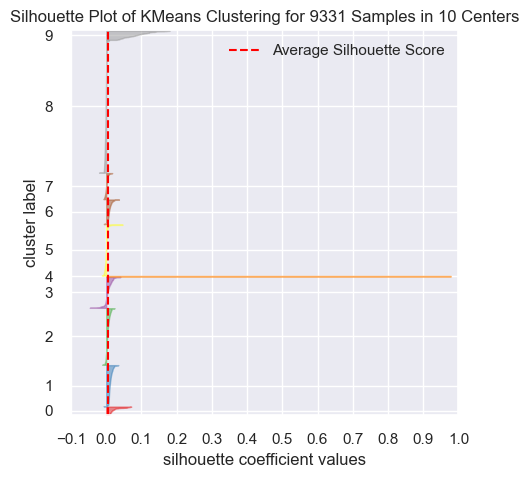

For n_clusters = 11, silhouette score is 0.007447156977192437


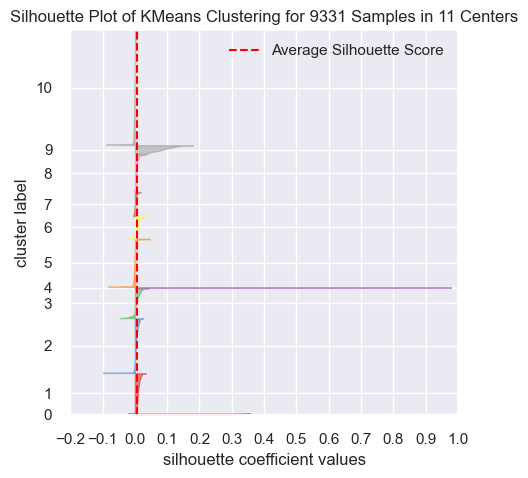

For n_clusters = 12, silhouette score is 0.007686161708428144


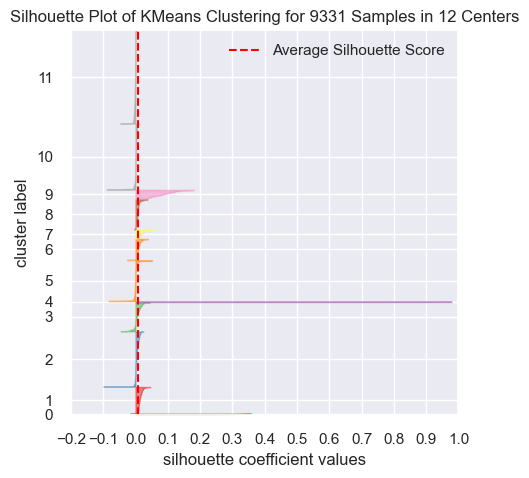

For n_clusters = 13, silhouette score is 0.008799154699749562


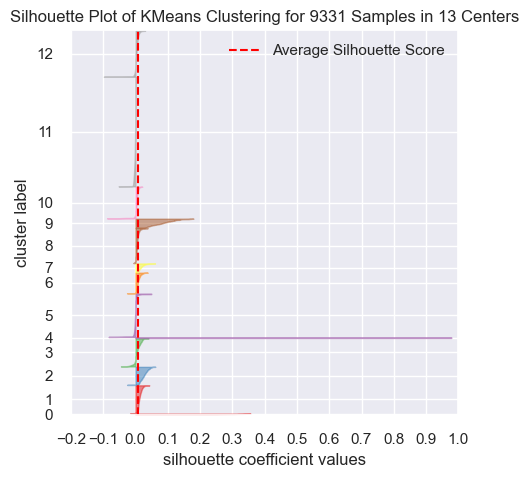

For n_clusters = 14, silhouette score is 0.009627318695663646


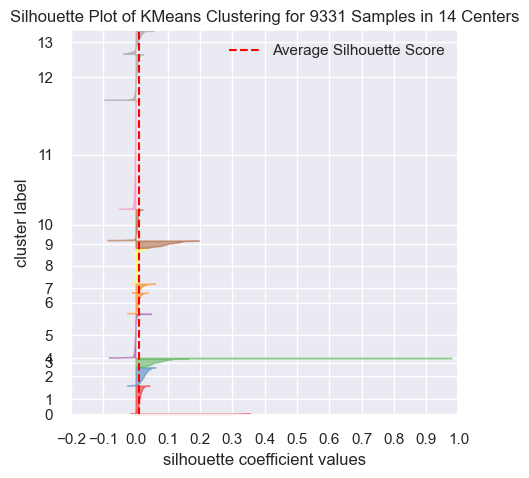

In [623]:
# Generate Silhouette Plots for Each Clusters
# Instantiate the clustering model and visualizer
for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
    km.fit(X)
    preds = km.predict(X)
    centers = km.cluster_centers_

    # Set parameters and labels
    score = silhouette_score(X, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(X) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# Here we define the number of clusters basis on the Silhouette Cofficient

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

**1:** Means clusters are well apart from each other and clearly distinguished.

**0:** Means clusters are indifferent, or we can say that the distance between clusters is not significant.

**-1:** Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# We decided the number of clusters basis on the some rules and analysis of the graph

##### Which hyperparameter optimization technique have you used and why?
Here we got Silhouette Coefficient for optimal number of clusters. From this data we got optimal number of clusters is 5 because it has a higher Silhouette Coefficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.
Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?
Silhouette score is the best evaluation metric for optimization the number of clusters.

The optimal number of cluster gives us the lightness and transparency of the business.

Through cluster we can find out which type of customers are in our data.

This evaluation metric makes business decision easier. Getting the Silhouette score is very easy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?
From the charts we can see that K-Mean Clustering model is best model for our data.

Here we get optimal number of clusters is 6, but often the number of clusters is already determined within the business. If the number of clusters within a business is already determined, we can apply the algorithm well.

Within the K-Mean Cluster graph we can see that the clusters are well divided.

Through this cluster we can know what type of data is in which cluster.

The goal of this problems may be to discover groups of similar examples within the data.

The primary function of this algorithm is to perform segmentation, whether it is store, product, or customer. Customers and products can be clustered into hierarchical groups based on different attributes.

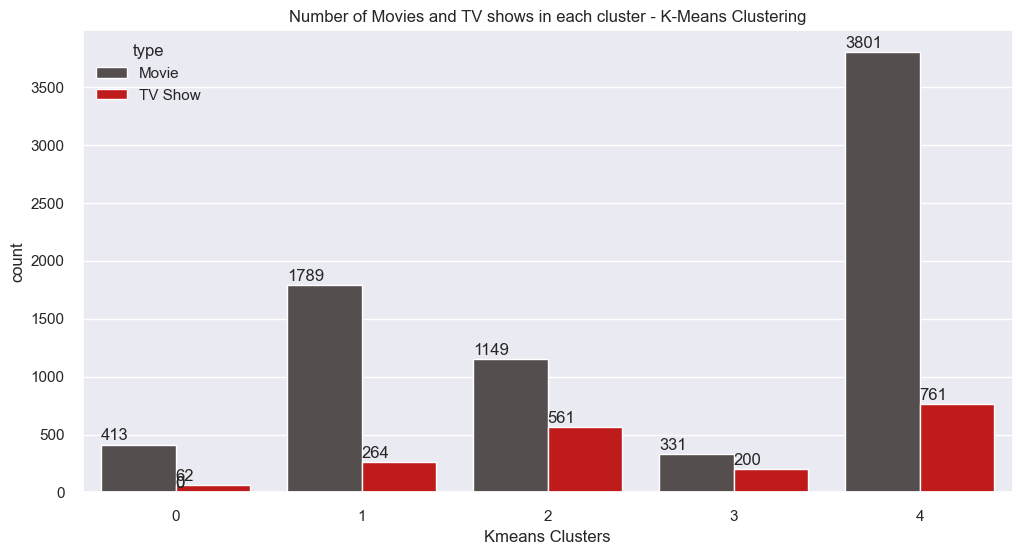

In [624]:
# Count Plot Visualization Code for number of movies and tv shows in each cluster
# Set labels
plt.figure(figsize=(12,6))
graph = sns.countplot(x='K_mean_cluster',data=data, hue='type', palette=['#564d4d', '#db0000'])
plt.title('Number of Movies and TV shows in each cluster - K-Means Clustering')
plt.xlabel('Kmeans Clusters')

# Adding value count on the top of bar
for p in graph.patches:
   graph.annotate(format(p.get_height(), '.0f'), (p.get_x(), p.get_height()), xytext = (0,3), textcoords = 'offset points')

Let's do Cluster Analysis....................
*  Clustering similar content by matching text-based features

In [626]:
# WordCloud Plot Visualization Code for User Rating Review
# Define a Function for Clustering Similar Content by Matching Text-Based Features
def kmeans_worldcloud(cluster_num):

 # Create a String to Store All The Words
  comment_words = ''

  # Remove The Stopwords
  stopwords = set(STOPWORDS)

  # Iterate Through The Column
  for val in data[data['K_mean_cluster']==cluster_num].tags.values:

      # Typecaste Each Val to String
      val = str(val)

      # Split The Value
      tokens = val.split()

      # Converts Each Token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(comment_words)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Words In Cluster {cluster_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  # Display Chart
  plt.show()

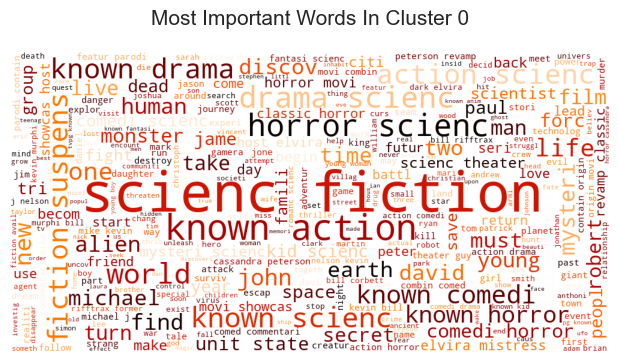

In [627]:
# WordCloud for cluster 0
kmeans_worldcloud(0)

**Keywords observed in cluster 0: Science Fiction, horror science, fiction suspense movies etc.**

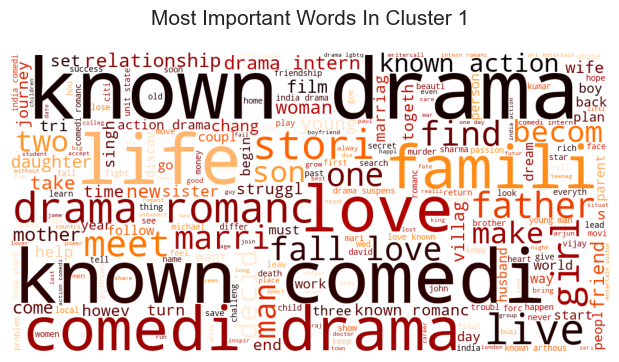

In [628]:
# WordCloud for cluster 1
kmeans_worldcloud(1)

**Keywords observed in cluster 1: known drama, known comedies, comedy drama, love etc.**

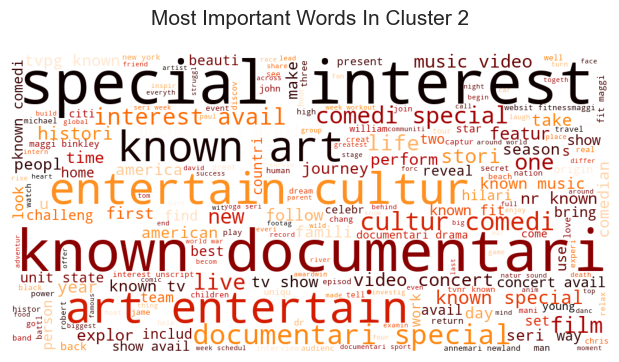

In [629]:
# WordCloud for cluster 2
kmeans_worldcloud(2)

**Keywords observed in cluster 2: special interest, known documentaries, art entertainment, entertainment culture etc.**

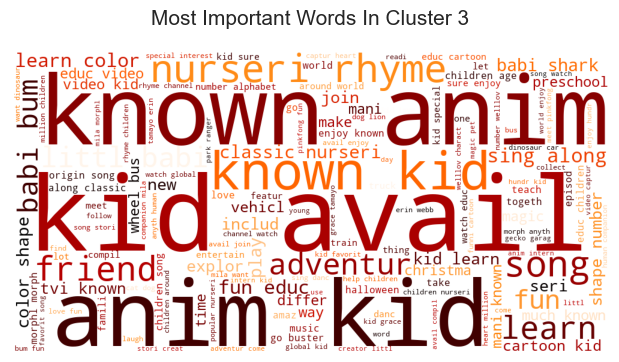

In [630]:
# WordCloud for cluster 3
kmeans_worldcloud(3)

**Keywords observed in cluster 3: kid, known anime, anime, known kid etc.**

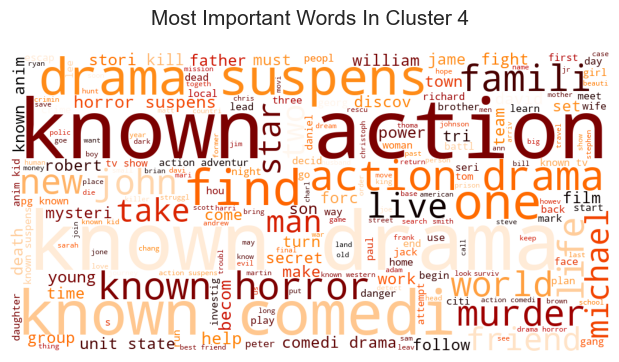

In [631]:
# WordCloud for cluster 4
kmeans_worldcloud(4)

**Keywords observed in cluster 4: known action, drama suspense, known drama, known comedies etc.**

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

In [ ]:
# Here i have use topic modeling instead of feature importance and model explainability.
# Model explainability does majory help in classification problem but here is the project of unsupervised ML.
# In topic modeling, we can get topic wise feature importance.

Here i have use topic modeling. Assume that the clusters are topics. Here for topic modeling i use CountVectorizer process for Vectorization of data and i use Latent Dirichlet Allocation for building a topic.

In [633]:
# Use count vectorization process for our data
# Create a count vectorizer object
count_vectorizer = CountVectorizer()

# Fit the count vectorizer using the text data
document_term_matrix=count_vectorizer.fit_transform(data['tags'])

In [634]:
# LDA model

from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=6)
lda.fit_transform(document_term_matrix)

array([[0.00880801, 0.53589162, 0.00880821, 0.0088546 , 0.00887143,
        0.42876613],
       [0.25576588, 0.00560294, 0.00560106, 0.00560258, 0.43859174,
        0.2888358 ],
       [0.48995642, 0.00409413, 0.49366588, 0.00409621, 0.00409407,
        0.00409329],
       ...,
       [0.0067126 , 0.00670691, 0.00670508, 0.00670075, 0.96648966,
        0.00668499],
       [0.00400895, 0.0039955 , 0.00400679, 0.00401553, 0.00400332,
        0.97996991],
       [0.00306341, 0.00305457, 0.00305925, 0.54554857, 0.44221973,
        0.00305447]])

In [635]:
# Most Important Features for Each Topic
vocab = count_vectorizer.get_feature_names_out()

for i, comp in enumerate(lda.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")

Topic 0: 
known kid anim avail drama 

Topic 1: 
known drama comedi action music 

Topic 2: 
known special documentari interest comedi 

Topic 3: 
known drama comedi suspens life 

Topic 4: 
known drama comedi suspens action 

Topic 5: 
known drama seri suspens action 



In [658]:
# Generate WordCloud Images for Given Topics
# Define a Function for Visualize Most Important Features for Each Topic
def draw_word_cloud(topic_num):

  # Create a String to Store All The Words
  imp_words_topic=''

  # Set Parameters
  comp=lda.components_[topic_num]
  vocab_comp = zip(vocab, comp)
  sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:25]
  # Remove The Stopwords
  stopwords = set(STOPWORDS)
  for word in sorted_words:
    imp_words_topic=imp_words_topic+" "+word[0]

  # Set Parameters
  wordcloud = WordCloud(width = 1000, height = 500,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10,
                  max_words = 1000,
                  colormap = 'gist_heat_r').generate(imp_words_topic)

  # Set Labels
  plt.figure(figsize = (6,6), facecolor = None)
  plt.title(f'Most Important Features in Topic {topic_num}', fontsize = 15, pad=20)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

  #Display Chart
  plt.show()

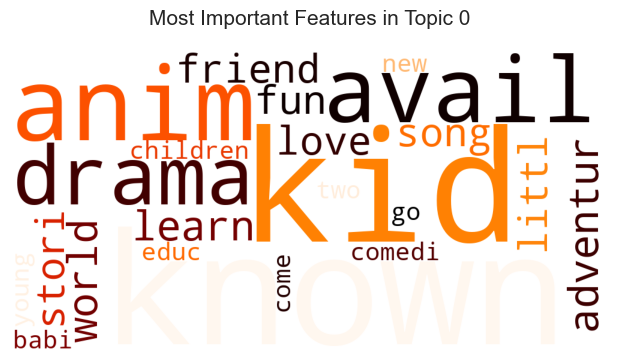

In [659]:
# WordCloud for Topic 0
draw_word_cloud(0)

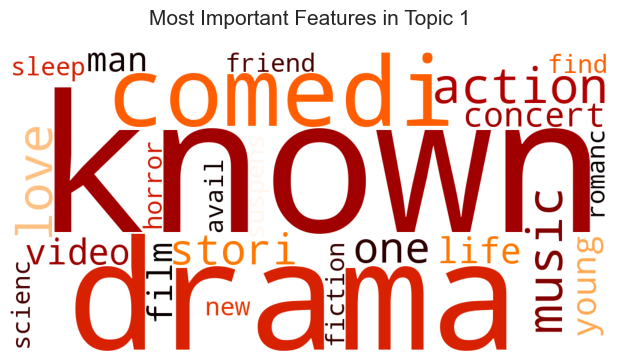

In [660]:
# WordCloud for Topic 1
draw_word_cloud(1)

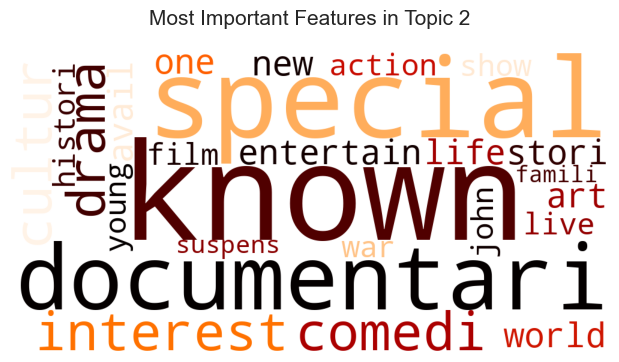

In [661]:
# WordCloud for Topic 2
draw_word_cloud(2)

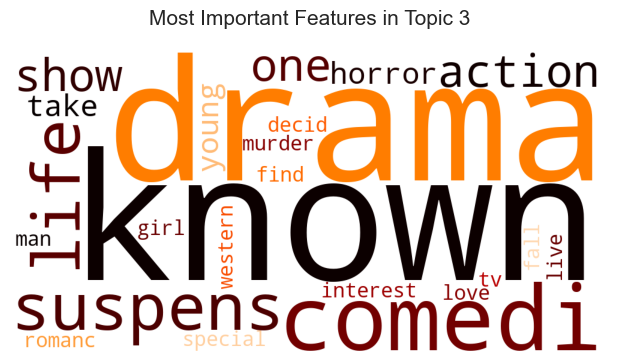

In [662]:
# WordCloud for Topic 3
draw_word_cloud(3)

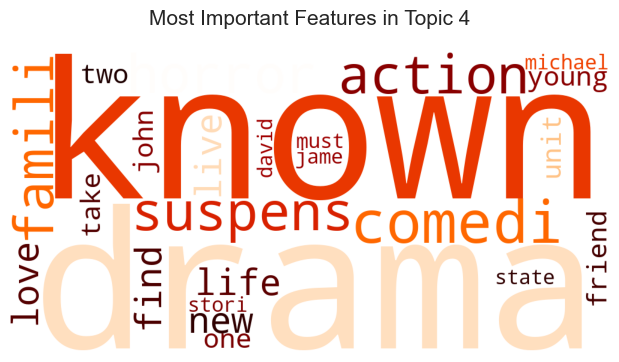

In [663]:
# WordCloud for Topic 4
draw_word_cloud(4)

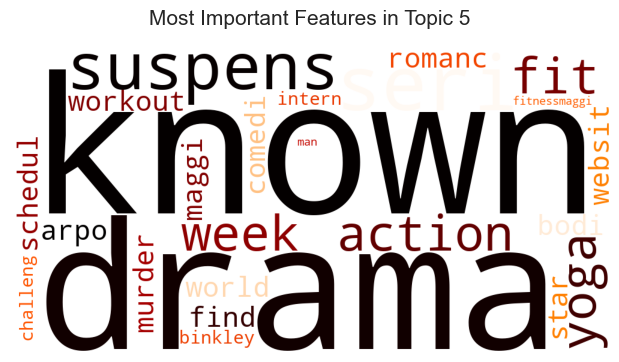

In [664]:
# WordCloud for Topic 5
draw_word_cloud(5)

Here from those wordcloud plots we can know which word is important for which cluster. We can also decide the name of Topics (Clusters) from this plots.

## ***8. Content Based Recommender System***

In [652]:
# Defining a new dataframe for building a recommender system
recommender_df = data.copy()

# Resetting index
recommender_df.reset_index(inplace=True)

# Dropping show-id and index column
recommender_df = recommender_df.drop(columns=['index', 'show_id'])

In [653]:
# Calculate cosine similarity on transformed array independent features created from tags(cluster) column
similarity = cosine_similarity(X)

In [654]:
# Define a function which recommends top 10 shows on the basis of cosine similarity score
def recommend(content):
  try:
    '''
    This function recommends top 10 shows similar to the input show based on their similarity scores.
    '''

    # Find the index position of the input content
    index = recommender_df[recommender_df['title'] == content].index[0]

    # Sorting on the basis of similarity score, in order to find out distances from recommended one
    distances = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda x:x[1])

    # Display the input movie/tv show name
    print('--'*30)
    print(f"Since you liked '{content}', you may also like:")
    print('--'*30)

    # List the top ten recommended movies/tv shows
    for i in distances[1:11]:
      print(data.iloc[i[0]].title)
  except:
     print(f"Didn't find any matches for '{content}'. Browse other popular TV shows and movies.")

In [675]:
# Testing Recommender System on a United States Movie
recommend("Twilight")

------------------------------------------------------------
Since you liked 'Twilight', you may also like:
------------------------------------------------------------
Women of Valor
Prison Shadows (1936)
Hawaii
Butch Cassidy and the Sundance Kid (4K UHD)
Light Sleeper
Blackbird (4K UHD)
Blackbird
Hud
Young Frankenstein
Jeff, Who Lives at Home


In [676]:
# Testing Recommender System on a International (United States, United Kingdom) Movie
recommend('Cinderella')

------------------------------------------------------------
Since you liked 'Cinderella', you may also like:
------------------------------------------------------------
Archive
The World is Not Enough (4K UHD)
The Kacey Musgraves Christmas Show
Borat Subsequent Moviefilm
Lalaloopsy: Band Together
The Love Punch
American Animals
Rogue Cell 2: Shadow Warrior
Slow Burn (2000)
Boynton Beach Club


In [673]:
# Testing Recommender System on a International (UK, Canada, US) TV Show
recommend('Lost In Oz')

------------------------------------------------------------
Since you liked 'Lost In Oz', you may also like:
------------------------------------------------------------
Yu-Gi-Oh! 5D's
Comicstaan
Enchantimals
Just Add Magic
Thomas & Friends S22 (US)
Craig Ferguson Presents: Hobo Fabulous
The Tick
Starhunter Redux
IWish
The Immortalists


In [672]:
# Testing Recommender System on a Content, Which is Not Listed in Amazon Prime Dataset
recommend('Avenger')

Didn't find any matches for 'Avenger'. Browse other popular TV shows and movies.


## ***9.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [650]:
# Save the File
import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean,open('kmeans_model.pkl','wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [651]:
# Load the File and predict unseen data.
# Unserialize process (rb=read byte)
pickled_model= pickle.load(open('kmeans_model.pkl','rb'))

# Predicting the unseen data
pickled_model.predict(X)

array([1, 0, 2, ..., 4, 4, 4])

In [657]:
y_kmean

array([1, 0, 2, ..., 4, 4, 4])

# **Conclusion**

The objective of the project was to cluster TV shows and movies based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 10 shows to users based on their viewing history. Some key points from the project include:

* Exploring the dataset consist of 9968 records and 12 attributes, with a focus on missing value imputation and exploratory data analysis (EDA).

* The analysis revealed that Amazon Prime has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

* To cluster the shows, i have selected six key attributes: director, cast, country, genre, rating, and description (all are categorical variables). These attributes were transformed into a 9000-feature TF-IDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. Captured more than 80% of the variance by reducing the components to 2500.

* Next, I used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method confirmed that the optimal number of clusters was 6 for K-Means, however for Silhouette score analysis it was 5.

* In Agglomerative clustering the optimal number of clusters was also 5, which we visualized with a dendrogram.

* Continued all the efforts by creating a content-based recommender system using the similarity matrix obtained through cosine similarity.

The recommender system offers personalized recommendations based on the type of shows the user has watched and provides the user with ten top-notch suggestions to explore.